## Three-layered neural network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
dataset = loadmat('face_emotion_data.mat')

X, Y = dataset['X'], dataset['y']
n, p = np.shape(X)
Y[Y==-1] = 0  # use 0/1 for labels instead of -1/+1
X = np.hstack((np.ones((n,1)), X))  # append a column of ones
n, p = np.shape(X)

def logsig(_x):
    return 1/(1+np.exp(-_x))

In [2]:
## Train NN Setup
Xb = X
q = 1 # number of classification problems
M = 32 # number of hidden nodes

alpha = 0.05 # step size
L = 200 # number of epochs

Run: 1


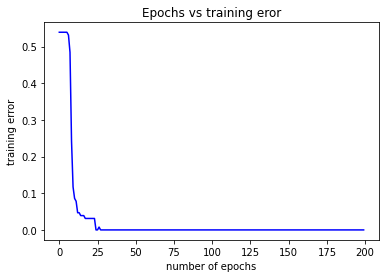

Run: 2


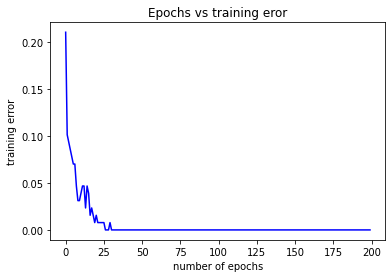

Run: 3


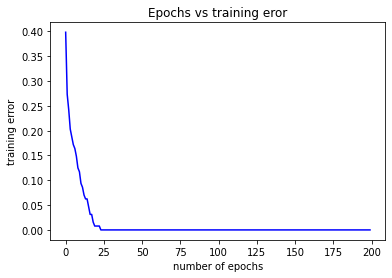

Run: 4


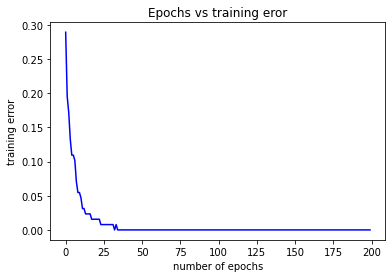

Run: 5


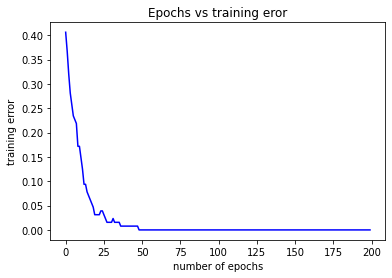

Run: 6


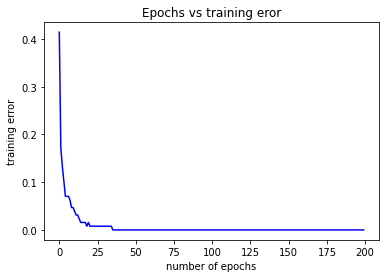

Run: 7


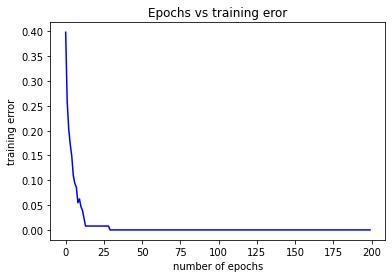

Run: 8


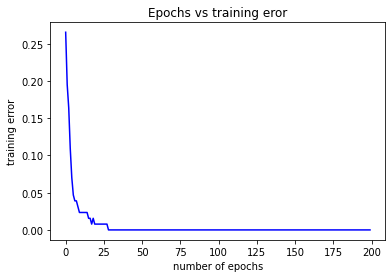

Run: 9


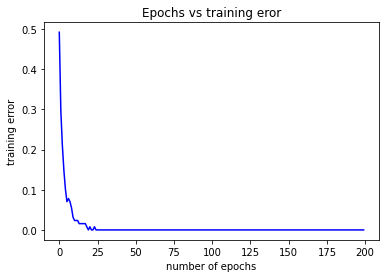

Run: 10


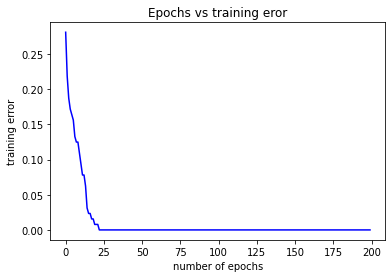

Run: 11


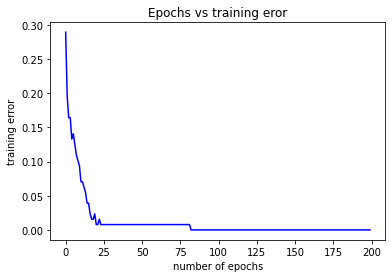

Run: 12


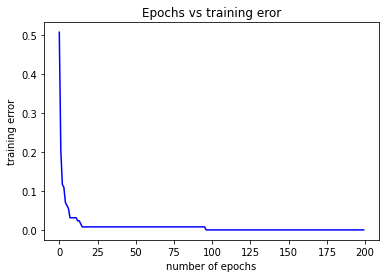

Run: 13


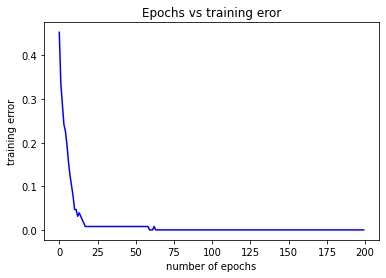

Run: 14


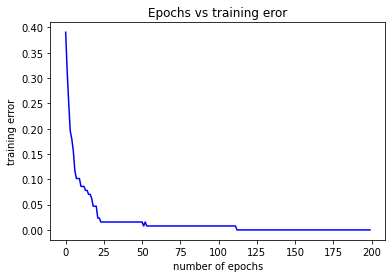

Run: 15


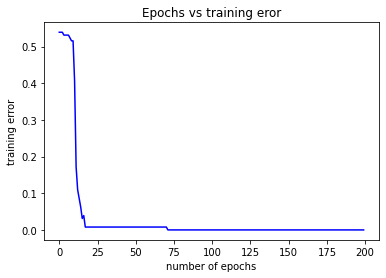

Run: 16


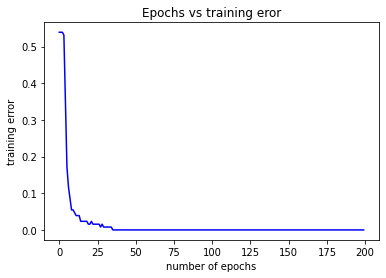

Run: 17


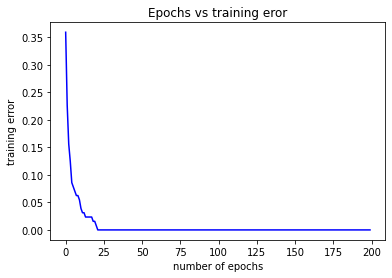

Run: 18


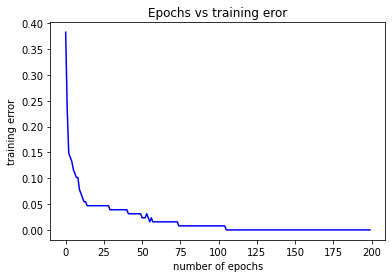

Run: 19


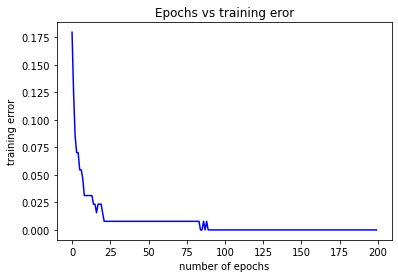

Run: 20


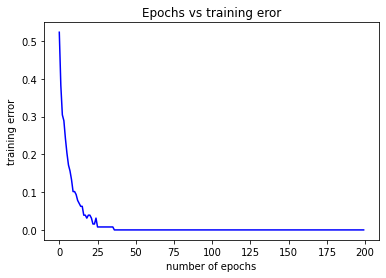

Average number of epochs for perfect classification to be achieved: 49.35


In [5]:
zero_err_epochs = [] # For calculating number of epochs required for perfect classification
for run in range(20):
    ## initial weights
    V = np.random.randn(M+1, q); 
    W = np.random.randn(p, M);

    epochs = []
    error_rates = []
    print('Run:', run + 1)
    done = 0
    ## Train Neural Network 
    for epoch in range(L):
        ind = np.random.permutation(n)
        for i in ind:
            # Forward-propagate
            H = logsig(np.hstack((np.ones((1,1)), Xb[[i],:]@W)))
            Yhat = logsig(H@V)
            # Backpropagate
            delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
            Vnew = V-alpha*H.T@delta
            gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
            Wnew = W - alpha*Xb[[i],:].T@gamma
            V = Vnew
            W = Wnew
        
        ## Final predicted labels (on training data)
        H = logsig(np.hstack((np.ones((n,1)), Xb@W)))
        Yhat = logsig(H@V)    
        
        # Calculating training error
        error = np.mean((Yhat>0.5)!=(Y>0.5))
        error_rates = np.concatenate((error_rates, [error]))
        epochs = np.concatenate((epochs, [epoch])) # for plot
        if error == 0 and done == 0:
            zero_err_epochs = np.concatenate((zero_err_epochs, [epoch]))    
            done = 1
    
    # Plot
    plt.plot(epochs, error_rates, 'b-')
    plt.title('Epochs vs training eror')
    plt.xlabel('number of epochs')
    plt.ylabel('training error')
    plt.show()
print('Average number of epochs for perfect classification to be achieved:', np.mean(zero_err_epochs))

In [10]:
 # Setup for Cross Validation - create 8 sets and each set is the holdout set in a case
setindices = [[0,16],[16,32],[32,48],[48,64],[64,80],[80,96],[96,112],[112,128]]
cases = len(setindices) # 8
cv_error = 0

for j in range(cases):   
    val_ind = np.arange(setindices[[j][0]][0], setindices[[j][0]][1]) # indices for validation set
    train_ind = list(set(range(128))-set(val_ind)) # training set indices
    
    # matrix of features and labels corresponding to validation set
    Xval = Xb[val_ind,:]
    Yval = Y[val_ind]
    m, k  = np.shape(Xval)
    
    # matrix of features and labels corresponding to the training set
    Xt = Xb[train_ind,:]
    Yt = Y[train_ind]
    
    ## initial weights
    V = np.random.randn(M+1, q); 
    W = np.random.randn(p, M);

    # Train classifier
    for epoch in range(L):
        ind = np.random.permutation(n-m) # rows of training set
        for i in ind:
            # Forward-propagate
            H = logsig(np.hstack((np.ones((1,1)), Xt[[i],:]@W)))
            Yhat = logsig(H@V)
            # Backpropagate
            delta = (Yhat-Yt[[i],:])*Yhat*(1-Yhat)
            Vnew = V-alpha*H.T@delta
            gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
            Wnew = W - alpha*Xt[[i],:].T@gamma
            V = Vnew
            W = Wnew

        # Test classifier using holdout set 
        H = logsig(np.hstack((np.ones((m,1)), Xval@W))) # m - rows in validation set
        Yhat = logsig(H@V)  
        if epoch == 199: # Converged error at end of iterations
            cv_error += np.mean((Yhat>0.5)!=(Yval>0.5))

# Print average error rate over all cross validation cases
print('Average testing error using 8-fold cross validation: ', np.mean(cv_error))

Average testing error using 8-fold cross validation:  0.3125
